# INF200 Lecture No J06

### Hans Ekkehard Plesser with material by Jonas van den Brink
### 9 June 2020

## Today's topics
- Classic population dynamics models
- Examples of BioSim Dynamics
- Analysis of BioSim Dynamics
- From discrete to continuous diffusion models

## Classic models

### Lotka-Volterra model

- Classic model of predator-prey population dynamics
- Each species is represented by a single density variable
- Dynamics are described by coupled, non-linear differential equations
\begin{align}
\dot{x} &= \alpha x - \beta x y  \\
\dot{y} &= \delta xy - \gamma y 
\end{align}
where $x$ is prey and $y$ is predator.
- Notes:
    - Solutions are continuous functions
    - Fractional values for $x$ and $y$ are possible, and animals never become extinct
    - One can remove three out of the four parameters by re-scaling
- See also [Wikipedia](https://en.wikipedia.org/wiki/Lotka–Volterra_equations)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
plt.rcParams['figure.figsize'] = (12, 4)

In [3]:
def du_dt(u, t=0):
    alpha = 1.0 # growth of prey
    beta = 0.1  # rate of predation
    delta = 0.075 # growth of predators
    gamma = 1.5 # decay of predators

    x, y = u
    return np.array([alpha*x - beta*x*y, delta*x*y - gamma*y])

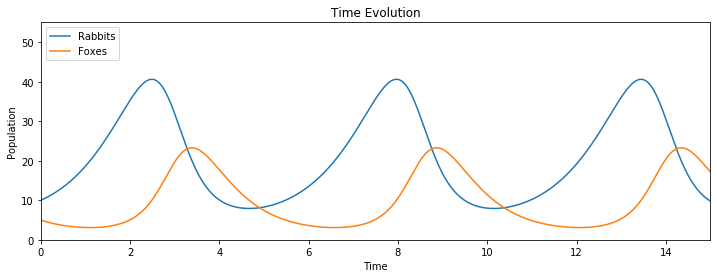

In [6]:
t = np.linspace(0, 15, 100001)
u = scipy.integrate.odeint(du_dt, (10, 5), t)

rabbit, fox = u[:, 0], u[:, 1]

plt.plot(t, rabbit)
plt.plot(t, fox)
plt.legend(['Rabbits', 'Foxes'], loc='upper left')
plt.axis([0, 15, 0, 55])
plt.title('Time Evolution')
plt.xlabel('Time')
plt.ylabel('Population');

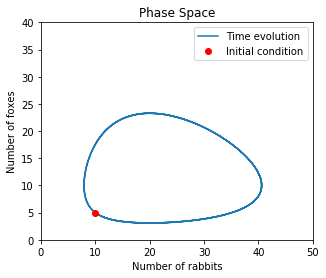

In [8]:
plt.plot(rabbit, fox)
plt.title('Phase Space')
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.axis([0, 50, 0, 40])
plt.plot(10, 5, 'ro')
plt.gca().set_aspect(aspect='equal')
plt.legend(['Time evolution', 'Initial condition']);

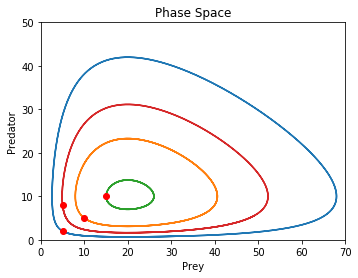

In [9]:
for u0 in [(5, 2), (10, 5), (15, 10), (5, 8)]:
    u = scipy.integrate.odeint(du_dt, u0, t)
    plt.plot(u[:,0], u[:,1])
    plt.plot(u0[0], u0[1], 'ro')

plt.title('Phase Space')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.gca().set_aspect(aspect='equal')
plt.axis([0, 70, 0, 50]);

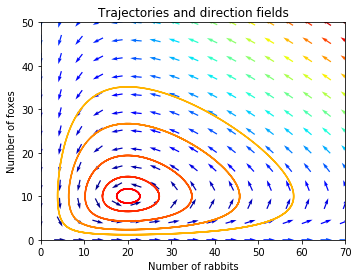

In [10]:
# Plot trajectories
values = ((6, 3), (9, 4), (12, 6), (15, 8), (18, 9))
colors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))

for u0, col in zip(values, colors):
    u = scipy.integrate.odeint(du_dt, u0, t)
    plt.plot(u[:,0], u[:,1], color=col)

# Plot phase space direction arrows
x = np.linspace(0, 70, 17)
y = np.linspace(0, 50, 13)
X, Y = np.meshgrid(x, y)
DX, DY = du_dt([X, Y])

# Normalize direction vectors
M = np.hypot(DX, DY)
M[M == 0] = 1.                                 # Avoid zero division errors
DX /= M                                        # Normalize each arrows
DY /= M

plt.title('Trajectories and direction fields')
plt.quiver(X, Y, DX, DY, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.gca().set_aspect(aspect='equal')
plt.axis([0, 70, 0, 50]);

#### The Lotka-Volterra is quite different from the BioSim model

- No spatial distribution (comparable to a single BioSim cell)
- Continuous, rather than discrete, in time
- Assumes infinite fodder for the prey/herbivores
- No random elements, it is a fully deterministic model
- Animals can never die out—why?

### Agent-based models

- A model such as the BioSim model is known as an *agent-based* model, because we have acting individuals.
- For a recent scientific paper comparing a continuous to an agent-based model of locust migration, see

    Bernoff AJ, Culshaw-Maurer M, Everett RA, Hohn ME, Strickland WC, Weinburd J (2020) 
    
    Agent-based and continuous models of hopper bands for the Australian plague locust: How resource consumption mediates pulse formation and geometry. 
    
    PLoS Comput Biol 16(5):e1007820. https://doi.org/10.1371/journal.pcbi.1007820

------------------------

## Examples of BioSim dynamics

- The examples below have been prepared using Plesser's reference implementation

### Herbivores in a single Lowland cell

- 50 herbivores with age 5 and weight 20 placed in single lowland cell
- Default parameters for animals and lowland
- Simulated 250 years
- Simulations performed with five different seeds
- For each simulation, herbivore count for each year is written to csv file

#### Load data from all five simulations to one NumPy array

In [13]:
import glob

In [48]:
mhd = [np.loadtxt(fname, delimiter=',') for fname in glob.glob('data_j06/mono_ho_*.csv')]
t = mhd[0][:, 0]   # time axis

# herbivore counts
h = np.zeros((len(t), len(mhd)))  
for k, cts in enumerate(mhd):
    h[:, k] = cts[:, 1]

#### Show all count traces

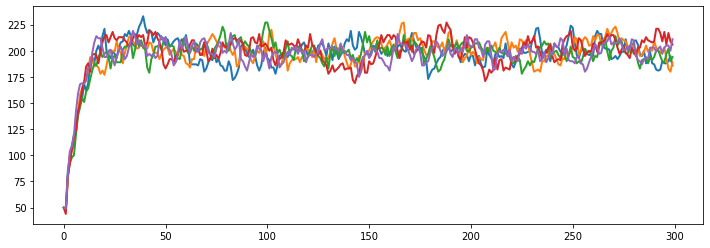

In [49]:
plt.plot(t, h, lw=2);

#### Extract data in stationary state

In [50]:
stat_n0 = 50
t_stat = t[stat_n0:]
h_stat = h[stat_n0:, :]

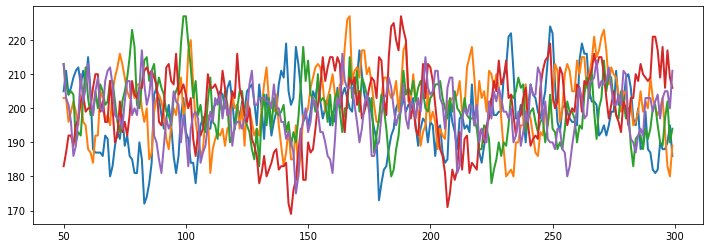

In [51]:
plt.plot(t_stat, h_stat, lw=2);

#### Mean and standard deviation of count

In [58]:
print("mean(num herb) = {:.1f} ± {:.1f}".format(h_stat.mean(), h_stat.std()))

mean(num herb) = 199.7 ± 9.3


#### Histogram of counts per simulation/seed

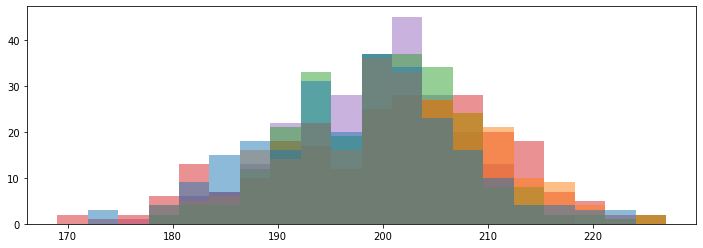

In [53]:
plt.hist(h_stat, histtype='stepfilled', bins=20, lw=3, alpha=0.5);

### Herbivores and carnivores in a single lowland cell

- 50 herbivores with age 5 and weight 20 placed in single lowland cell
- Simulated 50 years
- 20 carnivores with age 5 and weight 20 added
- Simulated 250 years
- Default parameters for animals and lowland
- Simulations performed with five different seeds
- For each simulation, herbivore and carnivore count for each year is written to csv file

In [54]:
mhcd = [np.loadtxt(fname, delimiter=',') for fname in glob.glob('data_j06/mono_hc_*.csv')]
tc = mhcd[0][:, 0]   # time axis

# herbivore and carnivore counts
hc = np.zeros((len(t), len(mhd)))  
cc = np.zeros((len(t), len(mhd)))  
for k, cts in enumerate(mhcd):
    hc[:, k] = cts[:, 1]
    cc[:, k] = cts[:, 2]

#### Plot animal counts

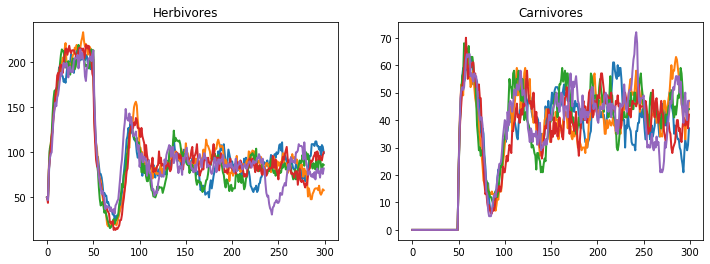

In [55]:
plt.subplot(1, 2, 1);
plt.plot(tc, hc, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc, cc, lw=2);
plt.title('Carnivores');

#### Late phase plots

With herbivores and carnivores in the simulation, there is not really a stationary state, but after 150 years the initial transients have died out. We look at the time after that.

In [56]:
stat_n0c = 150
tc_stat = tc[stat_n0c:]
hc_stat = hc[stat_n0c:, :]
cc_stat = cc[stat_n0c:, :]

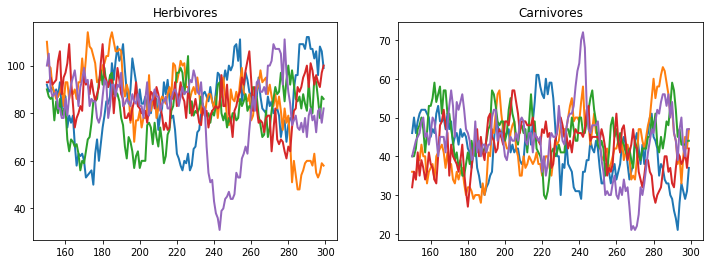

In [57]:
plt.subplot(1, 2, 1);
plt.plot(tc_stat, hc_stat, lw=2);
plt.title('Herbivores');

plt.subplot(1, 2, 2);
plt.plot(tc_stat, cc_stat, lw=2);
plt.title('Carnivores');

#### Mean animal numbers in late phase

In [60]:
print("mean(num herb) = {:5.1f} ± {:4.1f}".format(hc_stat.mean(), hc_stat.std()))
print("mean(num carn) = {:5.1f} ± {:4.1f}".format(cc_stat.mean(), cc_stat.std()))

mean(num herb) =  83.6 ± 13.5
mean(num carn) =  43.2 ±  7.5


---------------------------------------------------

### Sample simulation on an island

The figure below is based on the `check_sim.py` simulation script with the following
non-standard parameter values:

Item   | Parameter | Value
-- | -- | --
Herbivores | $\zeta$ | 3.2
           | $\xi$ | 1.8
Carnivores | $a_{1/2}$ | 70
           | $\phi_{\text{age}}$ | 0.5
           | $\omega$ | 0.3
           | $F$ | 65
           | $\Delta\Phi_{\text{max}}$ | 9
Lowland    | $f_{\text{max}}$ | 700

- Initially, 150 herbivores (age 5, weight 20) are placed at location (10, 10)
- After 100 years, 40 carnivores (age 5, weight 20) are added at location (10, 10)
- Simulation is continued for another 400 years

![check_sim](figures/check_sim_long.pdf)

------------------

### Migration only

- For testing purposes
- Particular parameter settings
    - No death, birth, or eating
    - Very large `a_half` to ensure "perfect" fitness
    - All animals with age 5, weight 50
```python
    sim.set_animal_parameters('Herbivore',
                                {'mu': 1, 'omega': 0, 'gamma': 0,
                                 'a_half': 1000})
    sim.set_animal_parameters('Carnivore',
                                {'mu': 1, 'omega': 0, 'gamma': 0,
                                 'F': 0, 'a_half': 1000})
```
- 1000 herbivores and 1000 carnivores placed in center initially

![mig0](figures/mig_00000.png) | ![mig1](figures/mig_00001.png) | ![mig2](figures/mig_00002.png)
-- | -- | --
![mig3](figures/mig_00003.png) | ![mig4](figures/mig_00004.png) | ![mig10](figures/mig_00010.png)

-------------------

## Exploring the BioSim Model

To have a better understanding of a complex and connected model, it is useful to simplify it and break it into components, which is what we will do now.

This is simply an exploration, not a definite analysis.

### Herbivores

First we look at the herbivores. We only look at the standard set of parameters here

In [66]:
hp = {'w_birth': 8.,
      'sigma_birth': 1.5,
      'beta': 0.9,
      'eta': 0.05,
      'a_half': 40.,
      'phi_age': 0.2,
      'w_half': 10.,
      'phi_weight': 0.1,
      'mu': 0.25,
      'lambda': 1.,
      'gamma': 0.2,
      'zeta': 3.5,
      'xi': 1.2,
      'omega': 0.4,
      'F': 10.}

#### Fitness function
The Fitness function is defined as the product of two sigmoidal functions, one for age and one for weight.
    $$q^+ = \frac{1}{1+\exp[{\phi_{\rm age}({\rm age} - {\rm age}_{1/2})}]}, \qquad q^- = \frac{1}{1+\exp[-{\phi_{\rm weight}({\rm weight} - {\rm weight}_{1/2})}]}$$

If you look closer at the functions, the biggest difference between them is the sign of the exponent, this makes the age-function monotonically decreasing, and the weight-function monotonically increasing. Let us plot them to get a better view

In [67]:
def q(sgn, x, xhalf, phi):
    return 1. / (1. + np.exp(sgn * phi * (x - xhalf)))

def Phi(a, w, p=hp):
    return (q(+1, a, p['a_half'], p['phi_age'])
            * q(-1, w, p['w_half'], p['phi_weight']))

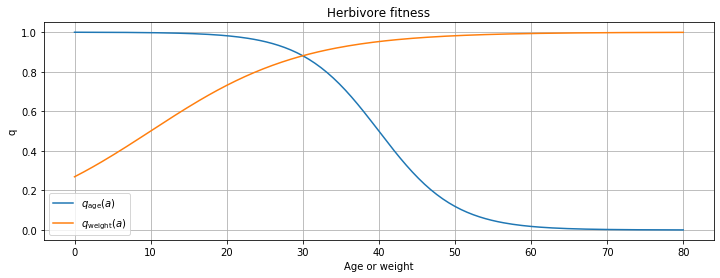

In [68]:
x = np.linspace(0, 80, 201);
plt.plot(x, q(+1, x, hp['a_half'], hp['phi_age']), label='$q_{\mathrm{age}}(a)$');
plt.plot(x, q(-1, x, hp['w_half'], hp['phi_weight']), label='$q_{\mathrm{weight}}(a)$');

plt.title('Herbivore fitness');
plt.legend();
plt.xlabel('Age or weight');
plt.ylabel('q');
plt.grid();

Interpretation: As the two functions are multiplied together to yield the fitness, an animal is fitter the younger and heavier it is. A starving or old animal can never be fit.

- From this it might seem that fittest animals are heavy newborns, but is this the case?
- We look closer at the fitnesses of newborn and their parents at the time of birth
    1. Newborns are born with weight $\mathcal{N}(w_b, \sigma)$
        - Newborns usually have fitnesses in $\Phi(0, [w_b \pm 2\sigma]$).
    1. To be able to give birth, a parent needs a weight of at least $\zeta(w_b + \sigma)$.
    1. Since we often have $N>10$ animals in a cell, each animal almost certainly gives birth as soon as it has the minimum weight required.
- Lowest birth-giving weight
    - animal ate at beginning of year and just made it across threshold
    - weight: $\zeta(w_b + \sigma)$
- Highest birth-giving weight
    - animal was just below threshold the previous year
    - lost weight at end of previous year
    - ate this year
    - weight: $(1-\eta)\zeta(w_b+\sigma) + \beta F$
- "Lowest" parent weight after birth (lightest parent, heaviest baby)
    - weight: $\zeta(w_b + \sigma) - \xi(w_b + 2\sigma)$
- "Highest" parent weight after birth (heaviest parent, lightest baby)
    - weight: $(1-\eta)\zeta(w_b+\sigma) + \beta F - \xi(w_b - 2\sigma)$

In [69]:
def plot_pf(age, clr):
    lo = ( hp['zeta'] * (hp['w_birth']+hp['sigma_birth'])
           - hp['xi'] * (hp['w_birth']+2*hp['sigma_birth']) )
    hi = ( (1-hp['eta'])*hp['zeta']*(hp['w_birth']+hp['sigma_birth'])
                     + hp['beta']*hp['F']
                     - hp['xi']*(hp['w_birth']-2*hp['sigma_birth']) )
    plt.fill_between(x, Phi(age*np.ones_like(x), lo), 
                        Phi(age*np.ones_like(x), hi), 
                 color=clr, alpha=.2, label=r'Parent fitness ($a={}$)'.format(age))

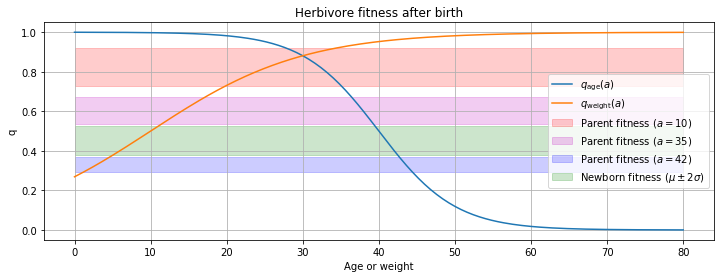

In [71]:
x = np.linspace(0, 80, 201);
plt.plot(x, q(+1, x, hp['a_half'], hp['phi_age']), label='$q_{\mathrm{age}}(a)$');
plt.plot(x, q(-1, x, hp['w_half'], hp['phi_weight']), label='$q_{\mathrm{weight}}(a)$');

plot_pf(10, 'r')
plot_pf(35, 'm')
plot_pf(42, 'b')
plt.fill_between(x, 
                 Phi(np.zeros_like(x), hp['w_birth']-2*hp['sigma_birth']), 
                 Phi(np.zeros_like(x), hp['w_birth']+2*hp['sigma_birth']), 
                 color='g', alpha=.2, label=r'Newborn fitness $(\mu\pm 2\sigma)$')


plt.title('Herbivore fitness after birth');
plt.legend();
plt.xlabel('Age or weight');
plt.ylabel('q');
plt.grid();

Observations from the figure:
- Up to age 35, parents are fitter than newborns after birth (weight is more important than age)
- Beyond age 42, parents are less fit than newborns (age more important than weight)

### Stationary weight for herbivores
- Under the following assumptions
    - Constant number of animals (no birth/death)
    - Infinite fodder

- How heavy will the animals become?

- Let $w_0$ be the birth weight of the animal, then the weight at the end of the first and second year is
\begin{align}
w_1 &= (1-\eta)(w_0 + \beta F), \\
w_2 &= (1-\eta)(w_1 + \beta F) = (1-\eta)((1-\eta)(w_0 + \beta F) + \beta F).
\end{align}
And for year $n$:
\begin{align}
w_n &= (1-\eta)(w_{n-1} + \beta F) = (1-\eta)^n w_0 + \beta F \sum_{k=1}^{n}(1-\eta)^k\\
    &= (1-\eta)^n w_0 + \beta F \frac{(1-\eta)-(1-\eta)^{n+1}}{\eta}
\end{align}

This formula for $w_n$ is a testable prediction for the time evolution of the BioSim model with given parameters.

The stationary weight, $\bar{w}$, is the 'stable' weight where the weight is not changing any more
$$\bar{w} = (1-\eta)(\bar{w} + \beta F)$$
Which can be solved to yield
        $$\bar{w} = \frac{1-\eta}{\eta}\beta F.$$

We obtain the same result by taking
$$\bar{w}=\lim_{n\to\infty}w_n=\beta F\frac{1-\eta}{\eta}$$
- For standard parameters, we have

In [72]:
(1-hp['eta'])/hp['eta'] * hp['beta'] * hp['F']

170.99999999999997

- This is a testable prediction.
- It is confirmed by simulation.

### Three groups of herbivores

![stat](figures/mono_hoh_2345_00020.png)

- Age histogram shows very few old animals (> 30)
    - even though age fitness is approx 0.85 at 30 and 0.5 at 40
- Weight histogram shows three peaks from left to right
    - one near mean birth weight (newborns)
    - one near mean birth weight + $\beta F$ (newborns who have eaten once)
    - a broad peak around mean birth weight + $2 \beta F$ (newborns who have eaten twice and animals who have given birth)
- No weights beyond approx 33 (limit for giving birth)
    - animals always give birth as soon as they can
- Fitness distribution follows roughly weight distribution

#### Will animals remain in the rightmost weight-distribution peak?

- An animal gains $\beta F=9$ every time it eats.
- If it thus gains a weight $> \zeta(w_{\text{birth}}+\sigma_{\text{birth}}9=33.5$ it feeds offspring and loses on average $\xi w_{\text{birth}}=9.6$, landing it back in the peak.
- If it did eat an not cross the birth-threshold it stays in the (upper end) of the peak.
- If the animal does not eat, it loses $\eta w \approx 0.05 \times 25=1.25$.
    - Eating just once compensate for $\beta F/(\eta w)=9/1.25\approx 7$ years of not eating
    - A cell contains food for $f_{\text{max}}/F=80$ animals.
    - With approx 200 animals in the cell, the probability that a single animal eats in a given year is thus $80/200=0.4$, and each animal eats on average every $2.5$ years.
- Since eating once per $7$ years suffices to stay in the rightmost peak of the weight distribution, while the animal eats on average every $2.5$ years, most animals will stay in the rightmost peak until they die.
    

#### Model of animal death beyond 20 years

- We assume that most animals > 20 years are have weights in the rightmost peak around 25
- The weight fitness is

In [135]:
qw = q(-1, 25, hp['w_half'], hp['phi_weight'])
qw

0.8175744761936437

- Age fitness drops from year to year, we denote it $q(a)$
- Assume that the animal is alive at age $A$. Then the probability that is is alive at age $A+1$ is
$$p_{A+1}=1 - \omega(1-q_w q(A))$$
since the probability to die is $\omega(1-q_w q(A))$.
- The probability to be alive at $A+2$ is then
$$p_{A+2}=(1-\omega(1-q_w q(A+1))) p_{A+1}= (1-\omega(1-q_w q(A+1)))(1-\omega(1-q_w q(A))) $$
- And in general the probability to be alive $n$ years later is
$$
p_{A+n} = \prod_{k=0}^n (1-\omega(1-q_w q(A+k)))
$$
- We can plot this

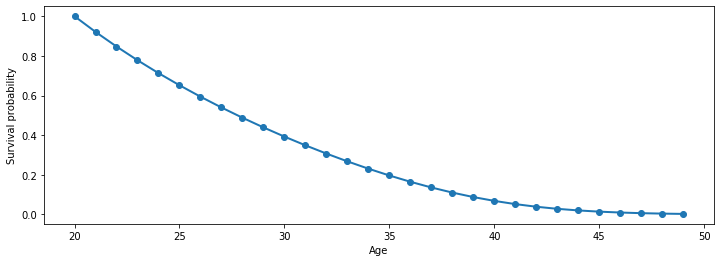

In [139]:
A = 20
n = 30
ps = np.ones(n)
ps[0] = 1
for k in range(1, n):
    ps[k] = (1 - hp['omega'] * (1 - qw * q(1, A+k-1, hp['a_half'], hp['phi_age']))) * ps[k-1]
age = list(range(A, A+n))
plt.plot(age, ps, 'o-', lw=2)
plt.xlabel('Age')
plt.ylabel('Survival probability');

- This fits somewhat reasonably with the observation in the histogram, although a more careful check is required to conclude.